# 2.3 教師あり機械学習アルゴリズム

これから、最も一般的な機械学習アルゴリズムについて、どのようにデータから学習し、どのように予測を行うのかを見ていく。モデルの複雑さという概念が個々のモデルで果たす役割について述べ、個々のアルゴリズムが、モデルを構築する方法の概要を示す。さらに、それぞれのアルゴリズムの長所と短所、適しているデータの種類について述べる。重要なパラメータとオプションについても説明する[<sup>1</sup>](#id_01)。多くのアルゴリズムは、クラス分類と回帰のバリエーションがあるので両方とも説明する。

個々のアルゴリズムの説明をすべて詳しく読む必要はないが、モデルを理解することで個々の機械学習アルゴリズムの働き方についてよりよく理解することができるだろう。本書はリファレンスガイドとしても利用できる。アルゴリズムの動作がわからなくなったら、本章に立ち戻るとよいだろう。

<span id="id_01">すべてを説明するのはこの本の範囲を超える。</span>

## 2.3.1 サンプルデータセット

これからさまざまなアルゴリズムを紹介するために、いくつかのデータセットを使う。そのうちのいくつかは、小さくて合成したもの（つまりでっち上げたもの）で、アルゴリズムの特定の側面を強調するように設計されている。この他に、大きい、実世界から取ってきたデータセットも用いる。

合成した2クラス分類データセットの例として、forgeデータセットを見てみよう。このデータセットは、2つの特徴量を持つ。下のコードはこのデータセットのデータポイントを散布図にプロットする。第1特徴量をx軸に、第2特徴量をy軸にプロットしている。散布図ではいつもそうだが、1つの点が1つのデータポイントを表す。点の色と形はクラスを表している。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

X.shape: (26, 2)


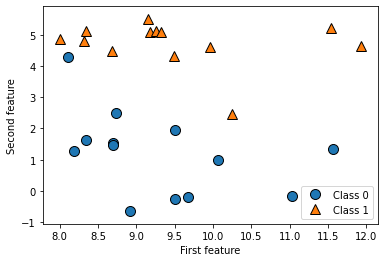

In [3]:
# データセットの作成
X, y = mglearn.datasets.make_forge()
# データセットをプロット
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

X.shapeからわかるように、このデータセットは、2つの特徴量を持つ26のデータポイントで構成されている。

回帰アルゴリズムを紹介する際には、合成したwaveデータセットを用いる。このwaveデータセットは、入力として1つの特徴量と、モデルの対象となる連続値のターゲット変数（もしくは__反応__(response)）を持つ。下図に示すプロットは、特徴量をx軸に、回帰のターゲット（出力）をy軸に取っている。

Text(0, 0.5, 'Target')

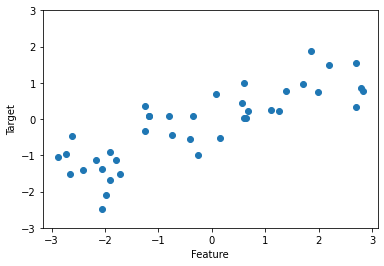

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

このように非常に単純な、低次元のデータセットを使うのは、可視化が容易だからである。印刷物には2次元なので、2つ以上の特徴量は表示しにくいからだ。ただし、少ない特徴量を持つデータセット（__低次元データセット__(low-dimensional dataset)）に対する直感が、多数の特徴量を持つデータセット（__高次元データセット__(high-dimensional dataset)）に対しても通用するとは限らない。このことさえ心に留めておけば、低次元データセットでアルゴリズムを検討することは学習のためになる。

これらの小さい合成データセットを補うために、scikit-learnに含まれている2つの実問題から取ったデータセットを用いる。その1つはウィスコンシン乳癌データセット(cancerと呼ぶ)である。これは、乳癌の腫瘍を計測したもので、それぞれの腫瘍に、害のない腫瘍を意味する「良性(benign)」か、癌性の腫瘍を意味する「悪性(malignant)」かのラベルが付けられている。ここでのタスクは、組織の測定結果から腫瘍が悪性かどうかを予測するように学習することである。

このデータはscikit-learnのload_breast_cancer関数でロードすることができる。

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


このデータセットは、30の特徴量を持つ569のデータポイントで構成されている。

In [6]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


569のデータポイントのうち、212が悪性で357が良性である。

In [ ]:
print("Sample count per class:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target)) }))